Guillermo Ramirez  
861299027  
EE 240  
HW 1  

**H1.1**: Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1,000 fair coins. Flip each coin independently 10 times. Let’s focus on 3 coins as follows. *c<sub>1<sub/>* is the first coin flipped; *c<sub>rand<sub/>* is a coin you choose at random; *c<sub>min<sub/>* is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let *ν<sub>1<sub/>*, *ν<sub>rand<sub/>*, and *ν<sub>min<sub/>* be the fraction of heads you obtain for the respective three coins. For a coin, let µ be its probability of heads.

(a) What is µ for the three coins selected?

*µ<sub>1</sub>* = *µ<sub>rand</sub>* = *µ<sub>min</sub>* = 0.5  

(b) Repeat this entire experiment a large number of times (e.g., 100,000 runs of the entire experiment) to get several instances of ν1, νrand, and νmin and plot the histograms of the distributions of ν1, νrand, and νmin. Notice that which coins end up being crand and cmin may differ from one run to another.  

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
mu_1 = .5
mu_rand = .5
mu_min = .5
N = 10000
nu_1 = np.zeros(N)
nu_rand  = np.zeros(N)
nu_min = np.zeros(N)

for i in range(N):
    all_coins = np.random.randint(2, size=(1000,10))
    # heads = 1
    # tails = 0
    heads_count = np.sum(all_coins,axis = 1)
    rand_loc = random.randrange(1000)
    min_loc = np.argmin(heads_count)
    nu_1[i] = heads_count[0]/10.0
    nu_rand[i] = heads_count[rand_loc]/10.0
    nu_min[i] = heads_count[min_loc]/10.0
    
hist_nu_1,bins = np.histogram(nu_1,bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1]) 
hist_nu_rand,bins = np.histogram(nu_rand,bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1]) 
hist_nu_min,bins = np.histogram(nu_min,bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1]) 



Text(0.5, 0.98, 'Histogram of $\\nu_{min}$')

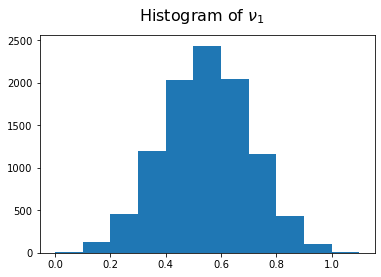

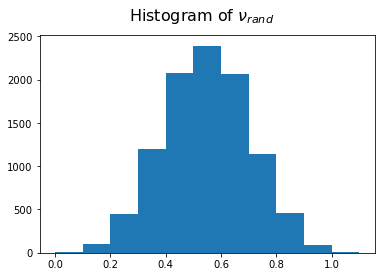

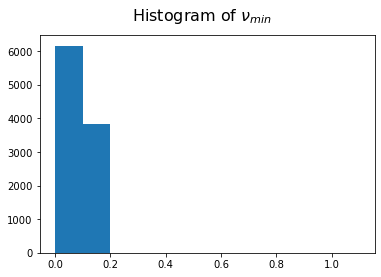

In [2]:
fig_1 = plt.figure()
fig1 = plt.subplot(111)
fig1.hist(nu_1,bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1])
fig_1.suptitle("Histogram of $\\nu_1$",fontsize = 16)

fig_2 = plt.figure()
fig2 = plt.subplot(111)
fig2.hist(nu_rand,bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1])
fig_2.suptitle("Histogram of $\\nu_{rand}$",fontsize = 16)

fig_3 = plt.figure()
fig3 = plt.subplot(111)
fig3.hist(nu_min,bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1])
fig_3.suptitle("Histogram of $\\nu_{min}$",fontsize = 16)






(c) Using part 1b plot estimates for P[|ν − µ| > $\epsilon$] as a function of $\epsilon$, together with the Hoeffding bound 2e<sup>−2$\epsilon$2N</sup> on the same graph.

(d) Which coins obey the Hoeffding bound, and which do not? Explain why

**H1.2**: Posterior probability estimation for bin selection problem (curse of dimensionality).

(a)  Suppose we have ten bins (four labeled A, six labeled B). Each bin has balls with two colors (red and blue). The distribution of red and blue balls in bin A is (0.3, 0.7). The distribution of red and blue balls in bin B is (0.7, 0.3). We randomly select a bin and draw two balls with *replacement*. That is, we select a bin, pick one ball, put it back, and pick another ball from the *same* bin. Estimate the probability that we selected bin A given the selected balls are red and blue. 

$$P(A\,|\,ball = red, blue) = \frac{P(ball = red, blue\,|\,A)P(A)}{P(ball = red, blue)} = \frac{P(red\,|\,A)\,P(blue\,|\,A)\,P(A)}{P(ball = red, blue)}$$

$$